## Approach 1: simple bag-of-words

In [1]:
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from nltk import FreqDist

In [2]:
df_0 = pd.read_csv('fashion data.csv')
tokens = nltk.word_tokenize(df_0['review text'].str.cat())

words1 = [w.lower() for w in tokens] 
words2 = [w for w in words1 if w.isalpha()]

In [3]:
freq = FreqDist(words2)
sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True)
sorted_freq[:30]

[('the', 6411),
 ('a', 4186),
 ('and', 3704),
 ('of', 3609),
 ('to', 2527),
 ('in', 2347),
 ('with', 1579),
 ('that', 1556),
 ('was', 1408),
 ('for', 1091),
 ('on', 1024),
 ('as', 921),
 ('it', 865),
 ('were', 697),
 ('her', 692),
 ('is', 682),
 ('but', 679),
 ('this', 655),
 ('his', 649),
 ('at', 606),
 ('from', 555),
 ('an', 538),
 ('collection', 487),
 ('by', 435),
 ('he', 423),
 ('be', 409),
 ('or', 406),
 ('she', 393),
 ('their', 392),
 ('its', 389)]

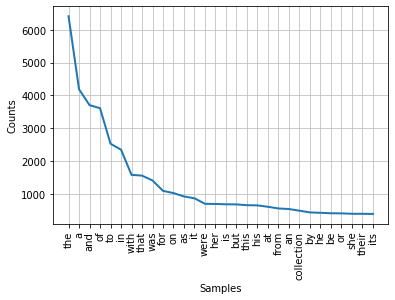

In [5]:
freq.plot(30)

## Approach 2: bag-of-words with stemming and stop words removal

In [6]:
#stop words removal
from nltk.corpus import stopwords

stopwords = stopwords.words('english') 

In [7]:
words_nostopwords = [w for w in words2 if w not in stopwords]

In [8]:
freq_nostw = FreqDist(words_nostopwords)
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
sorted_freq_nostw[:30]

[('collection', 487),
 ('new', 354),
 ('one', 345),
 ('dresses', 327),
 ('like', 313),
 ('show', 293),
 ('dress', 281),
 ('spring', 234),
 ('designer', 231),
 ('clothes', 224),
 ('said', 222),
 ('also', 221),
 ('season', 217),
 ('made', 201),
 ('pieces', 201),
 ('fashion', 200),
 ('looks', 192),
 ('look', 190),
 ('way', 186),
 ('white', 184),
 ('black', 184),
 ('came', 181),
 ('silk', 180),
 ('designers', 155),
 ('first', 152),
 ('back', 135),
 ('runway', 132),
 ('could', 129),
 ('would', 128),
 ('pants', 128)]

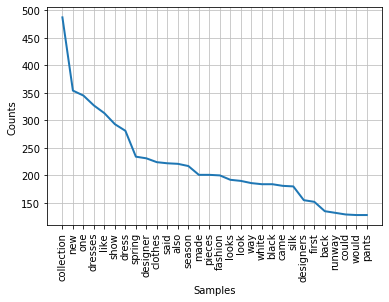

In [9]:
freq_nostw.plot(30)

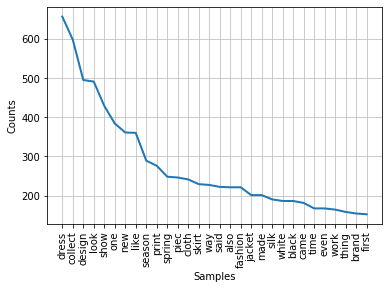

In [10]:
#stemming
#Use Porter Stemmer 
porter = nltk.PorterStemmer()
stem1 = [porter.stem(w) for w in words_nostopwords]

#Get the frequency distribution 
freq1 = FreqDist(stem1)
freq1.plot(30)

In [11]:
sorted_freq1 = sorted(freq1.items(),key = lambda k:k[1], reverse = True)
sorted_freq1[:30]

[('dress', 657),
 ('collect', 598),
 ('design', 495),
 ('look', 491),
 ('show', 429),
 ('one', 384),
 ('new', 361),
 ('like', 360),
 ('season', 289),
 ('print', 276),
 ('spring', 248),
 ('piec', 246),
 ('cloth', 241),
 ('skirt', 229),
 ('way', 227),
 ('said', 222),
 ('also', 221),
 ('fashion', 221),
 ('jacket', 201),
 ('made', 201),
 ('silk', 190),
 ('white', 186),
 ('black', 186),
 ('came', 181),
 ('time', 167),
 ('even', 167),
 ('work', 164),
 ('thing', 158),
 ('brand', 154),
 ('first', 152)]

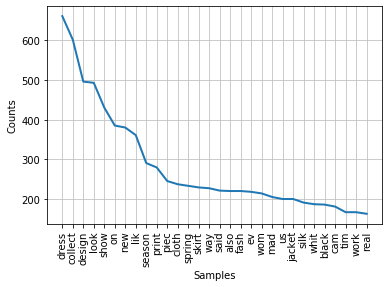

In [12]:
#use Lancaster Stemmer
lancaster = nltk.LancasterStemmer()
stem2 = [lancaster.stem(w) for w in words_nostopwords]

#Get the frequency distribution 
freq2 = FreqDist(stem2)
freq2.plot(30)

In [13]:
sorted_freq2 = sorted(freq2.items(),key = lambda k:k[1], reverse = True)
sorted_freq2[:30]

[('dress', 659),
 ('collect', 600),
 ('design', 495),
 ('look', 492),
 ('show', 430),
 ('on', 385),
 ('new', 380),
 ('lik', 361),
 ('season', 291),
 ('print', 280),
 ('piec', 246),
 ('cloth', 238),
 ('spring', 234),
 ('skirt', 230),
 ('way', 228),
 ('said', 222),
 ('also', 221),
 ('fash', 221),
 ('ev', 219),
 ('wom', 215),
 ('mad', 206),
 ('us', 201),
 ('jacket', 201),
 ('silk', 192),
 ('whit', 188),
 ('black', 187),
 ('cam', 182),
 ('tim', 168),
 ('work', 168),
 ('real', 164)]

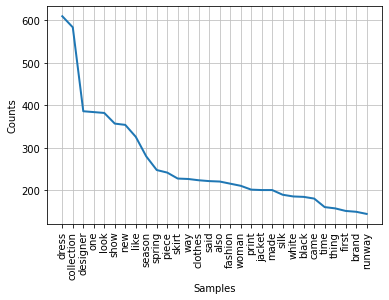

In [14]:
#use WordNet Lemmatizer
wnl = nltk.WordNetLemmatizer()
stem3 = [wnl.lemmatize(w) for w in words_nostopwords]

#Get the frequency distribution 
freq3 = FreqDist(stem3)
freq3.plot(30)

In [15]:
sorted_freq3 = sorted(freq3.items(),key = lambda k:k[1], reverse = True)
sorted_freq3[:30]

[('dress', 609),
 ('collection', 583),
 ('designer', 386),
 ('one', 384),
 ('look', 382),
 ('show', 357),
 ('new', 354),
 ('like', 326),
 ('season', 280),
 ('spring', 248),
 ('piece', 242),
 ('skirt', 228),
 ('way', 227),
 ('clothes', 224),
 ('said', 222),
 ('also', 221),
 ('fashion', 216),
 ('woman', 211),
 ('print', 202),
 ('jacket', 201),
 ('made', 201),
 ('silk', 190),
 ('white', 186),
 ('black', 185),
 ('came', 181),
 ('time', 161),
 ('thing', 158),
 ('first', 152),
 ('brand', 150),
 ('runway', 145)]

## Approach 3: POS (NN, NNP, NNS, NNPS)

In [16]:
#Generate a list of POS tags
POS_tags = nltk.pos_tag(tokens) #use unprocessed 'tokens', not 'words'
#Keep tags that start with 'N'
POS_tag_listN = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]

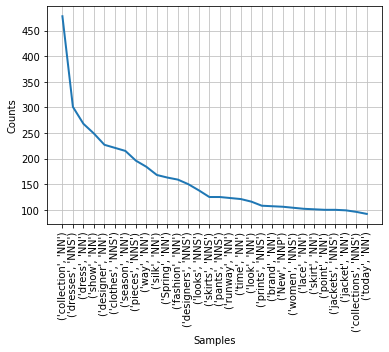

In [17]:
#Generate a frequency distribution 
tag_freq = nltk.FreqDist(POS_tag_listN)
tag_freq.plot(30)

In [18]:
sorted_tag_freq = sorted(tag_freq.items(),key = lambda k:k[1], reverse = True)
sorted_tag_freq[:30]

[(('collection', 'NN'), 478),
 (('dresses', 'NNS'), 301),
 (('dress', 'NN'), 268),
 (('show', 'NN'), 249),
 (('designer', 'NN'), 227),
 (('clothes', 'NNS'), 221),
 (('season', 'NN'), 215),
 (('pieces', 'NNS'), 196),
 (('way', 'NN'), 184),
 (('silk', 'NN'), 168),
 (('Spring', 'NN'), 163),
 (('fashion', 'NN'), 159),
 (('designers', 'NNS'), 150),
 (('looks', 'NNS'), 138),
 (('skirts', 'NNS'), 125),
 (('pants', 'NNS'), 125),
 (('runway', 'NN'), 123),
 (('time', 'NN'), 121),
 (('look', 'NN'), 116),
 (('prints', 'NNS'), 108),
 (('brand', 'NN'), 107),
 (('New', 'NNP'), 106),
 (('women', 'NNS'), 104),
 (('lace', 'NN'), 102),
 (('skirt', 'NN'), 101),
 (('point', 'NN'), 100),
 (('jackets', 'NNS'), 100),
 (('jacket', 'NN'), 99),
 (('collections', 'NNS'), 96),
 (('today', 'NN'), 92)]

## Approach 4: POS (NNP)

In [19]:
#Generate a list of POS tags
POS_tags = nltk.pos_tag(tokens) #use unprocessed 'tokens', not 'words'
#Keep tags that start with 'N'
POS_tag_listNNP = [(word,tag) for (word,tag) in POS_tags if tag.startswith('NNP')]

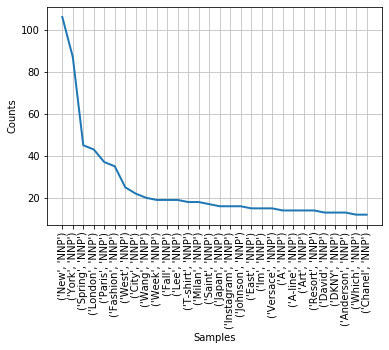

In [20]:
#Generate a frequency distribution 
tag_freqNNP = nltk.FreqDist(POS_tag_listNNP)
tag_freqNNP.plot(30)

In [21]:
sorted_tag_freqNNP = sorted(tag_freqNNP.items(),key = lambda k:k[1], reverse = True)
sorted_tag_freqNNP[:30]

[(('New', 'NNP'), 106),
 (('York', 'NNP'), 87),
 (('Spring', 'NNP'), 45),
 (('London', 'NNP'), 43),
 (('Paris', 'NNP'), 37),
 (('Fashion', 'NNP'), 35),
 (('West', 'NNP'), 25),
 (('City', 'NNP'), 22),
 (('Wang', 'NNP'), 20),
 (('Week', 'NNP'), 19),
 (('Fall', 'NNP'), 19),
 (('Lee', 'NNP'), 19),
 (('T-shirt', 'NNP'), 18),
 (('Milan', 'NNP'), 18),
 (('Saint', 'NNP'), 17),
 (('Japan', 'NNP'), 16),
 (('Instagram', 'NNP'), 16),
 (('Johnson', 'NNP'), 16),
 (('East', 'NNP'), 15),
 (('Im', 'NNP'), 15),
 (('Versace', 'NNP'), 15),
 (('A', 'NNP'), 14),
 (('A-line', 'NNP'), 14),
 (('Art', 'NNP'), 14),
 (('Resort', 'NNP'), 14),
 (('David', 'NNP'), 13),
 (('DKNY', 'NNP'), 13),
 (('Anderson', 'NNP'), 13),
 (('Which', 'NNP'), 12),
 (('Chanel', 'NNP'), 12)]